# ДЗ Линейная регрессия

В данном задании мы рассмотрим набор данных об учащихся, собранный в 2006 году в одной из школ Португалии. Данные представлены в неудобном для машинного обучения виде, и содержат мусор. Ваша задача &mdash; привести их к надлежащему виду и обучить на них простую модель.

Данные состоят из четырех файлов:
- data.csv &mdash; основная таблица с информацией о учащихся
- scores.csv &mdash; список финальных оценок по одному из предметов (20-балльная шкала переведенная в проценты)
- attendance.csv &mdash; таблица посещений занятий по этому предмету
- school_support.txt &mdash; список учащихся, которым оказывается финансовая поддержка

Ваша задача &mdash; построить модель для предсказания финальных оценок исходя из всех остальных данных и проверить качество ее работы с помощью кросс-валидации. В качестве алгоритма мы будем использовать линейную регрессию

Расшифровка столбцов в data.csv для справки:
- age &mdash; возраст
- Medu &mdash; уровень образования матери (по некоторой условной шкале)
- Fedu &mdash; уровень образования отца (по некоторой условной шкале)
- traveltime &mdash; время в пути до школы (1 – < 15 мин., 2 – от 15 до 30 мин., 3 – от 30 мин. to 1 ч.
или 4 – > 1 ч.)
- studytime &mdash; время, затрачиваемое на занятия вне школы (1 – < 2 ч., 2 – от 2 до 5 ч., 3 – от 5 до 10 ч. или 4 – > 10 ч.)
- famrel &mdash; насколько хорошие отношения в семье у учащегося (по некоторой условной шкале)
- freetime &mdash; количество свободного времени вне школы (по некоторой условной шкале)
- goout &mdash; время, затрачиваемое на общение с друзьями (по некоторой условной шкале)
- Dalc &mdash; количество употребления алкоголя в учебные дни (по некоторой условной шкале)
- Walc &mdash; количество употребления алкоголя в неучебные дни (по некоторой условной шкале)
- health &mdash; уровень здоровья (по некоторой условной шкале)
- sex_M &mdash; пол: мужской (1) или женский (0)
- address_U &mdash; живет ли учащийся в городе (1) или в пригороде (0)
- famsize_LE3 &mdash; размер семьи: не больше 3 человек (1) или больше (0)
- Pstatus_T &mdash; живут ли родители вместе (1) или отдельно (0)
- nursery &mdash; посещал ли учащийся детский сад
- plans_university &mdash; планирует ли учащийся поступать в университет (-1 или 1)
- past_failures &mdash; количество неудовлетворительных оценок по другим предметам ранее (от 0 до 4)

*Примечание. Несколько признаков в данных содержат ошибки/проблемы/некорректности. Эти проблемы нужно исправить. Для
проверки &mdash; всего в данных таких проблем четыре.*

### Задача 1: сломанный признак (а может и не один)
__(1 балл)__

Загрузите таблицу data.csv.

Найдите в данных сломанный признак (он не соответствует описанию) и исправьте его.

In [9]:
import pandas as pd
import numpy as np

data = pd.read_csv('data.csv')
valid_ages = data['age'][data['age'] < 100]  
median_age = valid_ages.median()
data['age'] = data['age'].apply(lambda x: median_age if x > 100 else x)
data['traveltime'] = data['traveltime'].apply(lambda x: x if x in [1, 2, 3, 4] else data['traveltime'].median())
plans_university = []
past_failures = []
for value in data['plans_universitypast_failures']:
    num_value = float(value)
    if 10 <= num_value <= 99:
        plans_university.append(str(int(num_value // 10)))  
        past_failures.append(str(int(num_value % 10)))      
    elif -99 <= num_value <= -10:
        abs_value = abs(num_value)
        plans_university.append('-' + str(int(abs_value // 10)))  
        past_failures.append(str(int(abs_value % 10)))            

data = data.drop('plans_universitypast_failures', axis=1)

data['plans_university'] = plans_university
data['past_failures'] = past_failures


data.to_csv('data.csv', index=False)

### Задача 2: пропуски в данных 
__(1 балл)__

Проверьте, есть ли в данных пропуски (значения NaN). Замените все пропущенные значения на среднее значение этого признака по столбцу.

*Hint: изучите в pandas функции loc, isnull, а также передачу булевых массивов в качестве индексов.*


In [13]:
import pandas as pd
import numpy as np

data = pd.read_csv('data.csv')


for column in data.columns:
    if data[column].isnull().any():  
        mean_value = data[column].mean()  
        data[column] = data[column].fillna(mean_value)  


data.to_csv('data.csv', index=False)

### Задача 3: нормализация данных
__(1 балл)__

Нормализуйте данные любым способом

score: [-0.20327384 -0.07628436 -0.06443402 -0.03798037]


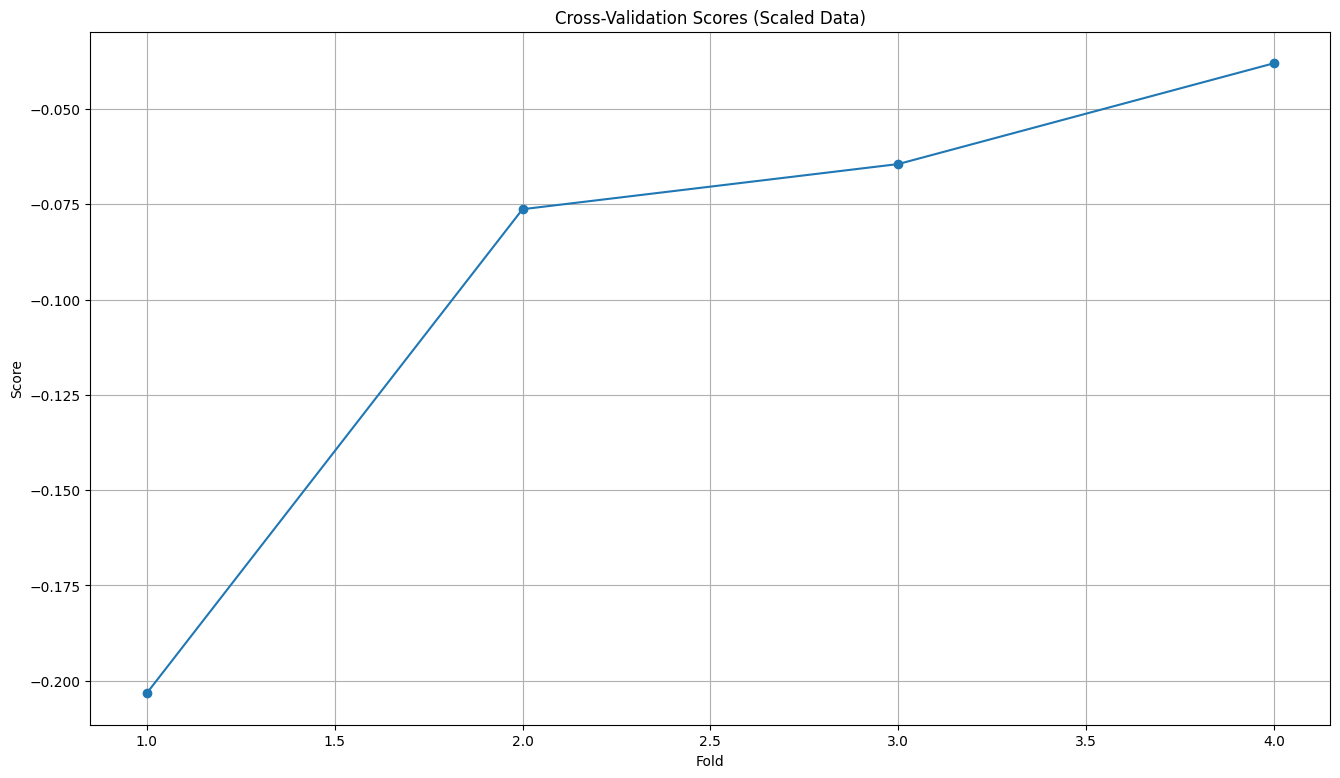

In [65]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold
import sklearn.linear_model as sk
import matplotlib.pyplot as plt

data = pd.read_csv('data.csv')
score = pd.read_csv('scores.csv')

dc = data.copy()

scaler = StandardScaler()
reg = sk.LinearRegression()
cv_scores = cross_val_score(reg, dc, score, cv=4)
p_sc = cv_scores
print("score:", cv_scores)


plt.figure(figsize=(16, 9))
plt.plot(range(1, len(cv_scores) + 1), cv_scores, marker='o', linestyle='-')
plt.title('Cross-Validation Scores (Scaled Data)')
plt.xlabel('Fold')
plt.ylabel('Score')
plt.grid(True)
plt.show()


### Задача 4: кросс-валидация для исходных данных
__(1 балл)__

Загрузите файл scores.csv и протестируйте, как линейная регрессия предсказывает ответ сейчас (с помощью кросс-валидации).

Кроссвалидацию сделайте по 4 разбивкам. Выведите качество в каждом их разбиений.

*Hint: воспользуйтесь sklearn.linear_model и sklearn.model_selection.*

In [66]:
import sklearn.model_selection
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold
import sklearn.linear_model as sk

data = pd.read_csv('data.csv')
score = pd.read_csv('scores.csv')

reg = sk.LinearRegression()

cv_scores = cross_val_score(reg, data, score, cv=4)

print("Cross-val:", cv_scores)


Cross-val: [-0.20327384 -0.07628436 -0.06443402 -0.03798037]


### Задача 5: полные данные
__(2 балла)__

Воспользуйтесь файлами attendance.csv и school_support.txt для того, чтобы добавить новые признаки в данные. Желательно по максимуму использовать возможности pandas для упрощения преобразований.

school_suport число в строке значит что i-ый школьник из исходной таблицы получал мат помощь (обратите внимание что строк в файле меньше, подумайте как правильно импортировать данные)

Добавьте данные таким образом, чтобы качество выросло

In [28]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score


data = pd.read_csv('data.csv')
scores = pd.read_csv('scores.csv')
attendance = pd.read_csv('attendance.csv')
positions = pd.read_csv('school_support.txt', names=["pos"])


attendance = attendance.replace({"+": 1}).fillna(0)
attendance["sum"] = attendance.sum(axis=1)
data["attendance"] = attendance["sum"]


data["support"] = 0
data.loc[positions["pos"]-1, "support"] = 1

### Задача 6: борьба с выбросами
__(1.5 балла)__

Качество предсказания может ухудшаться, если в данных присутствуют корректные значения признаков (с точки зрения чтения данных и применения методов), но не соответствующие реальным объектам. Например, данные могли быть введены в неверном формате, а потом слишком грубо приведены к общему виду, из-за чего ошибка не была замечена.
Попробуем от такого избавиться &mdash; а для этого такие объекты нужно сначала найти. Конечно, нам еще недоступны многие продвинутые способы, но давайте попробуем обойтись простыми.

Первый способ это сделать &mdash; посмотреть для каждого признака на распределение его значений и проверить крайние значения на правдоподобность. (постройте гистограммы для признаков, как минимум для подозрительных)

*Hint 1: используйте функцию DataFrame.hist*

*Hint 2: в описании датасета выше есть информация, необходимая для восстановления правильных значений*

          age      Medu      Fedu  traveltime  studytime    famrel  freetime  \
556  1.041396  0.428131  0.630866   -0.753218   0.083653  0.072606  0.780478   
500  1.041396  0.428131 -0.278983    0.589745  -1.122808  0.072606  0.780478   
435  0.213129  1.310216  0.630866   -0.753218   0.083653  0.072606 -0.171647   
491 -0.615138  1.310216  1.540715   -0.753218  -1.122808 -0.974536 -0.171647   
384  0.213129 -0.453954 -1.188832    1.932708  -1.122808  1.119748  1.732603   
353 -0.615138  1.310216  1.540715   -0.753218  -1.122808  0.072606 -2.075896   
302  0.213129 -1.336039  0.630866    1.932708   0.083653  1.119748 -1.123771   
515  2.697930 -0.453954 -1.188832    0.589745   0.083653 -3.068820 -1.123771   
422 -1.443405  1.310216  0.630866   -0.753218   0.083653  0.072606 -0.171647   
320  0.213129 -1.336039 -1.188832   -0.753218  -1.122808  0.072606 -0.171647   
584 -1.443405 -0.453954 -0.278983   -0.753218   1.290114  0.072606  0.780478   
318  1.041396 -0.453954 -1.188832   -0.7

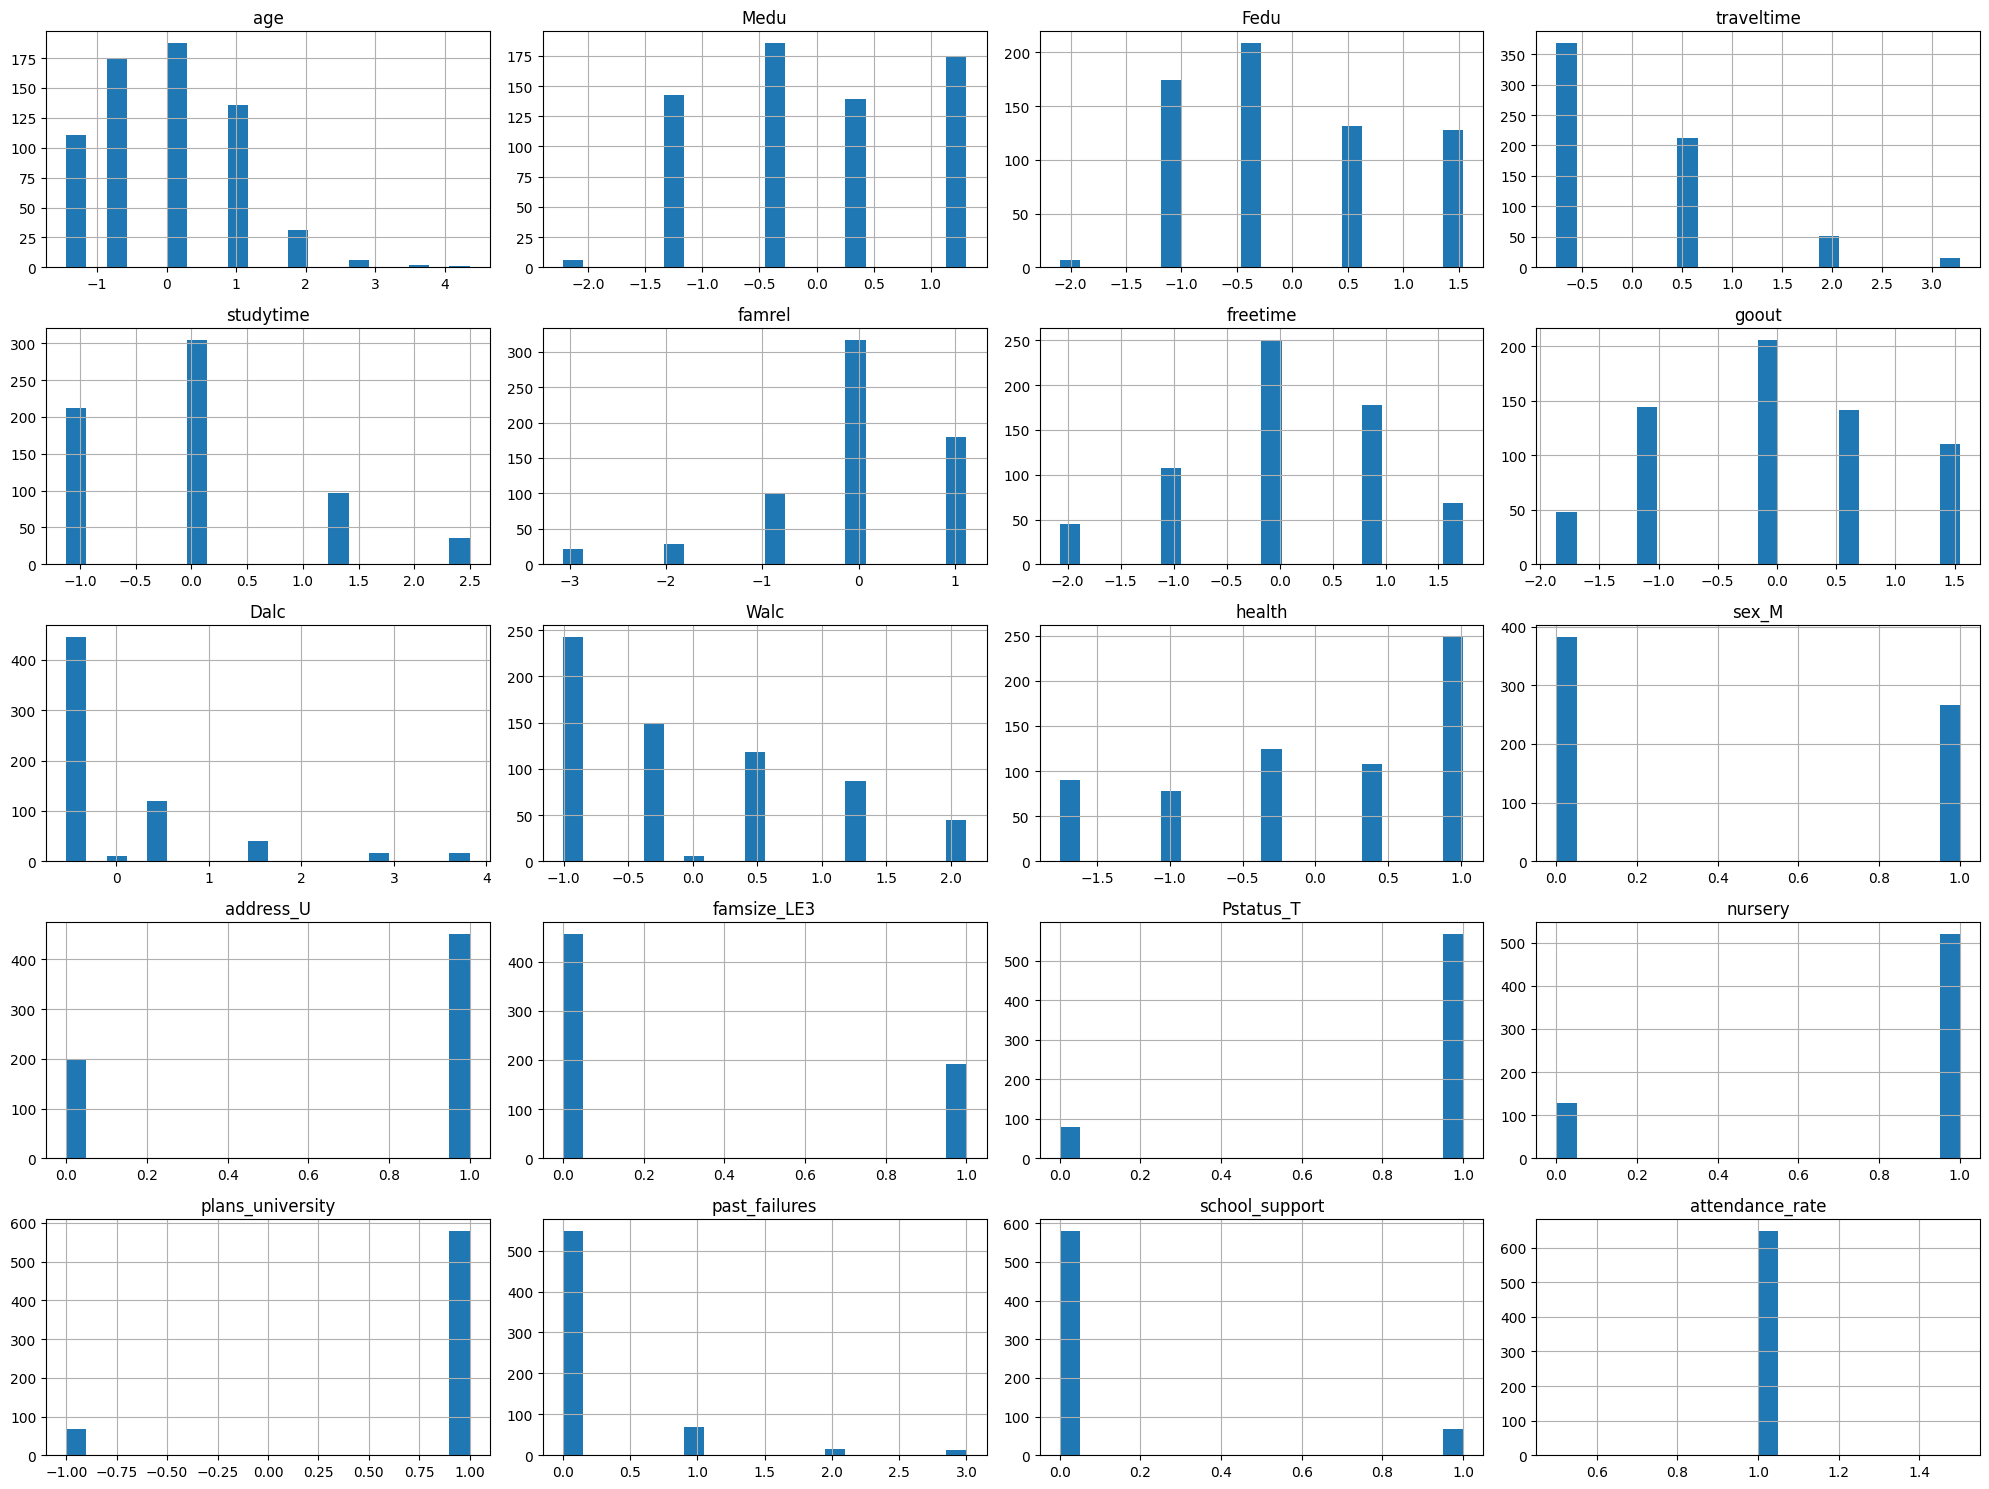

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


data = pd.read_csv('data.csv')
scores = pd.read_csv('scores.csv')

dc = data.copy()
min_size = min(len(data), len(scores))
dc = dc.iloc[:min_size]

numeric_cols = scores.select_dtypes(include=[np.number]).columns
sc = scores[numeric_cols[0]].values[:min_size]



reg = LinearRegression()
reg.fit(dc, sc) # обучение модели
p = reg.predict(dc) #предсказание
dist = np.abs(sc - p) # абс разность

top_dist = dc.iloc[dist.argsort()[-19:]] # 19 max value
print(top_dist)

dc.hist(figsize=(20, 15), bins=20)
plt.tight_layout()
plt.show()

__(1.5 балла)__

Другой простой способ найти выбросы &mdash; сделать предсказание и посчитать ошибку на каждом объекте по отдельности и посмотреть на объекты с наибольшей ошибкой. Обучите линейную регрессию (функция fit) и для каждого объекта посчитайте среднеквадратичное отклонение. Постройте гистограмму распределения ошибок. Посмотрите на гистограмму и удалите из выборки те объекты на которых ошибка слишком большая.

Обратите внимание, что просто удалять все объекты с высокой ошибкой нельзя &mdash; это, конечно, хороший способ добиться меньшей ошибки (на данной выборке), но одновременно вы ухудшите обобщающую способность алгоритма. Вместо этого вам нужно найти однозначно ошибочные записи и их исправить.

*Hint: возможно, все проблемы уже были найдены первым способом; для проверки &mdash; в сумме здесь нужно исправить 3 проблемы.*

Для поиска ошибки на одном отдельном обьекте придётся обучить линейную регрессию руками. Частичный пример, допишите код. Постройте гистограмму распределения ошибок

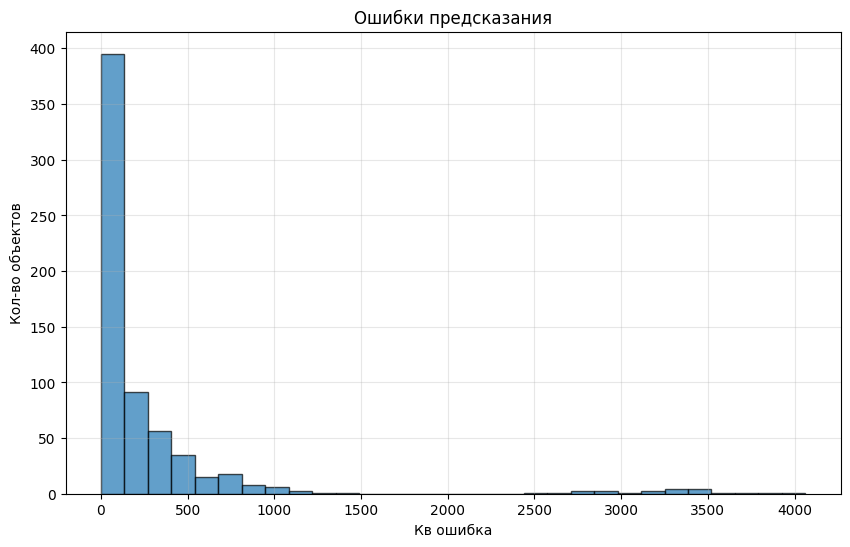

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

data = pd.read_csv('data.csv')
scores = pd.read_csv('scores.csv')

dc = data.copy()
min_size = min(len(data), len(scores))
dc = dc.iloc[:min_size]

numeric_cols = scores.select_dtypes(include=[np.number]).columns
sc = scores[numeric_cols[0]].values[:min_size]

reg = LinearRegression()
reg.fit(dc, sc)
p = reg.predict(dc)

error = (sc - p)**2


plt.figure(figsize=(10, 6))
plt.hist(error, bins=30, alpha=0.7, edgecolor='black')
plt.xlabel('Кв ошибка')
plt.ylabel('Кол-во объектов')
plt.title('Ошибки предсказания')
plt.grid(True, alpha=0.3)
plt.show()



### Финальное предсказание и отчёт (1 балл)

Проведите предсказание еще раз и сравните качество с исходным. Запишите свои наблюдения - как изменялось качество обучения модели при использовании разных модификаций данных. 

Cross-validation scores: [-0.20327384 -0.07628436 -0.06443402 -0.03798037]
res: [0.00000000e+00 0.00000000e+00 0.00000000e+00 2.22044605e-16]


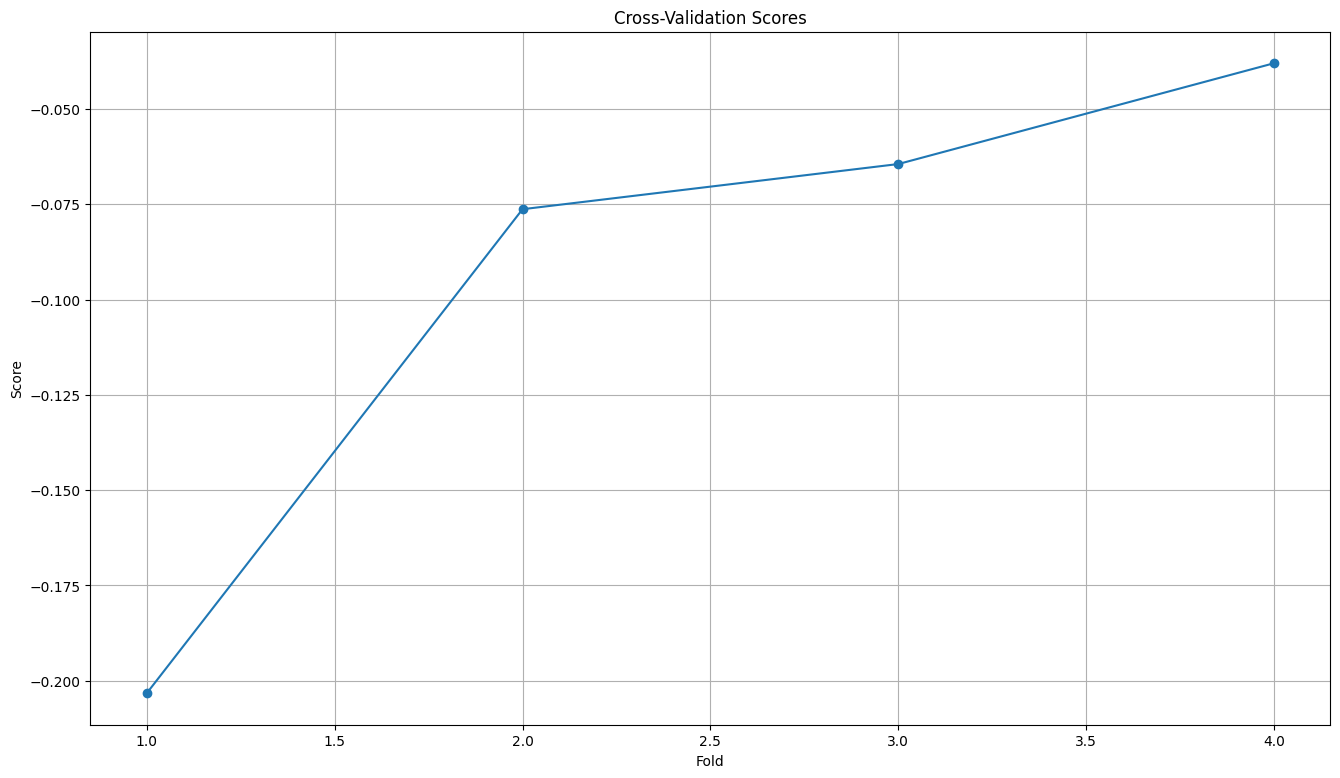

In [73]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import sklearn.model_selection
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold
import sklearn.linear_model as sk
from sklearn.preprocessing import StandardScaler




reg = sk.LinearRegression()

cv_scores = cross_val_score(reg, dc, sc, cv=4)


print("Cross-validation scores:", cv_scores)
print("res:", cv_scores - p_sc)
plt.figure(figsize=(16, 9))
plt.plot(range(1, len(cv_scores) + 1), cv_scores, marker='o', linestyle='-')
plt.title('Cross-Validation Scores')
plt.xlabel('Fold')
plt.ylabel('Score')
plt.grid(True)
plt.show()

#почти не поменялось